In [1]:
import datetime as dt
import glob
import numpy as np
import os

import pandas as pd
import xarray as xr


In [2]:
file = "../lt_arr.nc"
arr = xr.open_dataset(file)
arr = arr.siconca
arr

<xarray.DataArray 'siconca' (time: 31, yc: 432, xc: 432)>
[5785344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-01-05 2010-01-06 ... 2010-02-04
    lat      (yc, xc) float32 ...
    lon      (yc, xc) float32 ...
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03

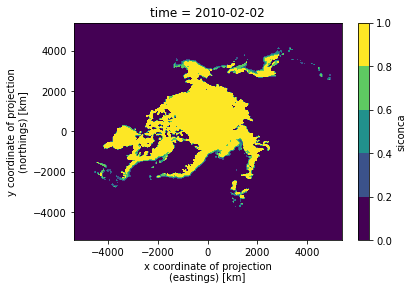

In [8]:
parr = arr.isel(time=-3, yc=slice(1))
parr.plot.contourf()

In [23]:
arr.sel(yc=)

<xarray.DataArray 'siconca' (time: 31, yc: 432, xc: 432)>
[5785344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-01-05 2010-01-06 ... 2010-02-04
    lat      (yc, xc) float32 ...
    lon      (yc, xc) float32 ...
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03

In [29]:
dfs = glob.glob("../processed/laptop/osisaf/nh/siconca/*.npy")
dfs

['../processed/laptop/osisaf/nh/siconca/2010_01_05.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_06.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_07.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_08.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_09.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_10.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_11.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_12.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_13.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_14.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_15.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_16.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_17.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_18.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_19.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_20.npy',
 '../processed/laptop/osisaf/nh/siconca/2010_01_21.npy',
 '../processed/laptop/osisaf/nh

In [32]:
narr = xr.DataArray([np.load(file) for file in dfs], dims=["time", "yc", "xc"])
narr

<xarray.DataArray (time: 31, yc: 432, xc: 432)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Dimensions without coordinates: time, yc, xc

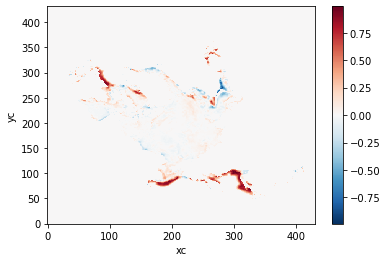

In [42]:
(narr.isel(time=-1) - narr.isel(time=0)).plot()